Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-6 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


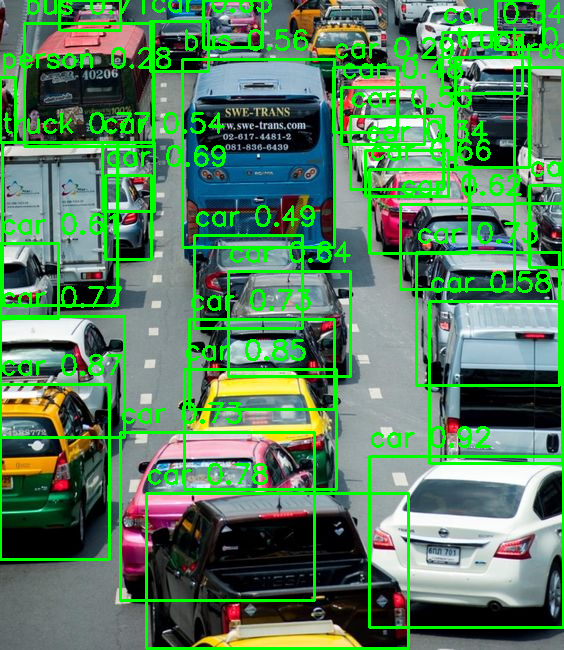

In [3]:
import torch
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the YOLOv5 model from PyTorch Hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load an image using OpenCV
image_path = '"/content/drive/MyDrive/Trafic_Dhaka.jpg"'  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform inference
results = model(image_rgb)

# Parse the results
detections = results.pandas().xyxy[0]  # Bounding boxes in Pandas DataFrame

# Draw bounding boxes and labels on the image
for index, row in detections.iterrows():
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    label = row['name']
    confidence = row['confidence']

    # Draw bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Put label and confidence
    text = f'{label} {confidence:.2f}'
    cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Save or display the result
cv2.imwrite('output_image.jpg', image)  # Save the result
cv2_imshow(image)  # Display the result in Colab